# **Analysis of Machine Learning-Related Questions on Stack Overflow: A Time Series Approach**





## **Introduction**
- Stack Overflow is one of the most popular platforms for programmers and data scientists to ask and answer technical questions.
- The dataset used in this analysis contains the number of questions posted on Stack Overflow over time, categorized by different topics.
- This time series data provides valuable insights into the trends and popularity of various technologies, helping us understand how interest in different subjects evolves over time.
- This data was taken from https://www.kaggle.com/datasets/aishu200023/stackindex



## **Abstract**

This project analyzes the trends in Stack Overflow questions related to machine learning over time. Using time series analysis techniques, we investigate the seasonality, trends, and forecasting potential of question volume.

Several models were explored to determine the most accurate approach.

This study offers insights into the increasing demand for machine learning knowledge and potential fluctuations in user engagement.


## **Methodology**  

This study applies models covered in the **Time Series and Classification** course, with a particular emphasis on **ARIMA models**. The analysis follows a structured approach, incorporating the following key steps:  

#### 1. Data Visualization and Cleaning  
- Initial exploration of the dataset to detect **anomalies**, **missing values**, and potential **preprocessing needs**.  

#### 2. Data Transformation - Stabilizing the variance
- Applying necessary **transformations** to stabilize variance

#### 3. Applying first differences to achieve stationarity
- Applying necessary differencing to stabilize the mean and ensure stationarity    

#### 4. Model Selection  
- Identifying **candidate models** based on statistical criteria.
- fitting these models

#### 5. Model fitting
- fit the candidate models

#### 6. Model evaluation
- Examine BIC and AIC for each model to compare them
- Examining **model residuals** to assess adequacy and ensure assumptions are met.   
- Using the selected model(s) to **predict future values**.  

#### 7. Conclusion

Each of these steps is detailed in the following sections.  


# 1. Data visualization and cleaning

In [1]:
install.packages("astsa")
library(astsa)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Read CSV file
data <- fread("data.csv")
head(data)

month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,⋯,Plato,Sympy,Flair,stanford-nlp,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
09-Jan,0,0,0,631,8,6,2,19,8,⋯,0,1,0,0,5,0,0,5,0,0
09-Feb,1,0,0,633,9,7,3,27,4,⋯,0,0,0,0,5,0,0,11,0,0
09-Mar,0,0,0,766,4,4,2,24,3,⋯,0,0,0,0,7,0,0,2,0,0
09-Apr,0,0,0,768,12,6,3,32,10,⋯,0,0,0,0,11,0,0,5,0,0
09-May,1,0,0,1003,2,7,2,42,7,⋯,0,0,0,0,10,0,0,3,0,0
09-Jun,0,0,0,1046,5,13,2,44,8,⋯,0,1,0,0,10,0,0,4,0,0


In [3]:
data$month <- as.Date(paste0("20", data$month, "-01"), format="%Y-%b-%d")

In [4]:
head(data)

month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,⋯,Plato,Sympy,Flair,stanford-nlp,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2009-01-01,0,0,0,631,8,6,2,19,8,⋯,0,1,0,0,5,0,0,5,0,0
2009-02-01,1,0,0,633,9,7,3,27,4,⋯,0,0,0,0,5,0,0,11,0,0
2009-03-01,0,0,0,766,4,4,2,24,3,⋯,0,0,0,0,7,0,0,2,0,0
2009-04-01,0,0,0,768,12,6,3,32,10,⋯,0,0,0,0,11,0,0,5,0,0
2009-05-01,1,0,0,1003,2,7,2,42,7,⋯,0,0,0,0,10,0,0,3,0,0
2009-06-01,0,0,0,1046,5,13,2,44,8,⋯,0,1,0,0,10,0,0,4,0,0


In [5]:
colnames(data)

[1] "month"                 "nltk"                  "spacy"                
 [4] "stanford-nlp"          "python"                "r"                    
 [7] "numpy"                 "scipy"                 "matlab"               
[10] "machine-learning"      "pandas"                "pytorch"              
[13] "keras"                 "nlp"                   "apache-spark"         
[16] "hadoop"                "pyspark"               "python-3.x"           
[19] "tensorflow"            "deep-learning"         "neural-network"       
[22] "lstm"                  "time-series"           "pillow"               
[25] "rasa"                  "opencv"                "pipenv"               
[28] "seaborn"               "Dask"                  "jupyter"              
[31] "AllenNLP"              "Theano"                "plotly"               
[34] "scikit-learn"          "BeautifulSoup"         "scrapy"               
[37] "Gensim"                "FastText"              "Pydot"                
[40] "Pybrain"               "Pytil"                 "Pygame"               
[43] "Colab"                 "Shogun"                "KNIME"                
[46] "Apache"                "Gunicorn"              "Pygtk"                
[49] "Weka"                  "Conda"                 "Ray"                  
[52] "matlab"                "accord.net"            "regression"           
[55] "classification"        "correlation"           "cluster-analysis"     
[58] "H2o"                   "Mallet"                "Numba"                
[61] "Tableau"               "Trifacta"              "PyArrow"              
[64] "Rasterio"              "Orange3"               "PyMC3"                
[67] "Opennn"                "Oryx"                  "Istio"                
[70] "Venes"                 "Plotnine"              "Gluon"                
[73] "Plato"                 "Sympy"                 "Flair"                
[76] "stanford-nlp"          "pyqt"                  "Nolearn"              
[79] "Lasagne"               "OCR"                   "Apache-spark-mlib"    
[82] "azure-virtual-machine"

## **Why Machine Learning?**
Machine learning has become one of the most significant and rapidly growing fields in recent years, impacting industries ranging from healthcare and finance to autonomous systems and recommendation engines. By analyzing the trend of Stack Overflow questions related to machine learning, we aim to explore:
- The growth and fluctuations in the number of questions over time.
- Possible correlations with major developments in machine learning, such as the release of new frameworks (e.g., TensorFlow, PyTorch) or research breakthroughs.
- Seasonal patterns or recurring trends in question volume.

Through this analysis, we can gain insights into how the interest in machine learning has evolved and potentially predict future trends in the field.

In [6]:
data_ml <- data[, c("month","machine-learning")]

In [7]:
install.packages("ggplot2")
install.packages("tidyverse")
library(ggplot2)
library(tidyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


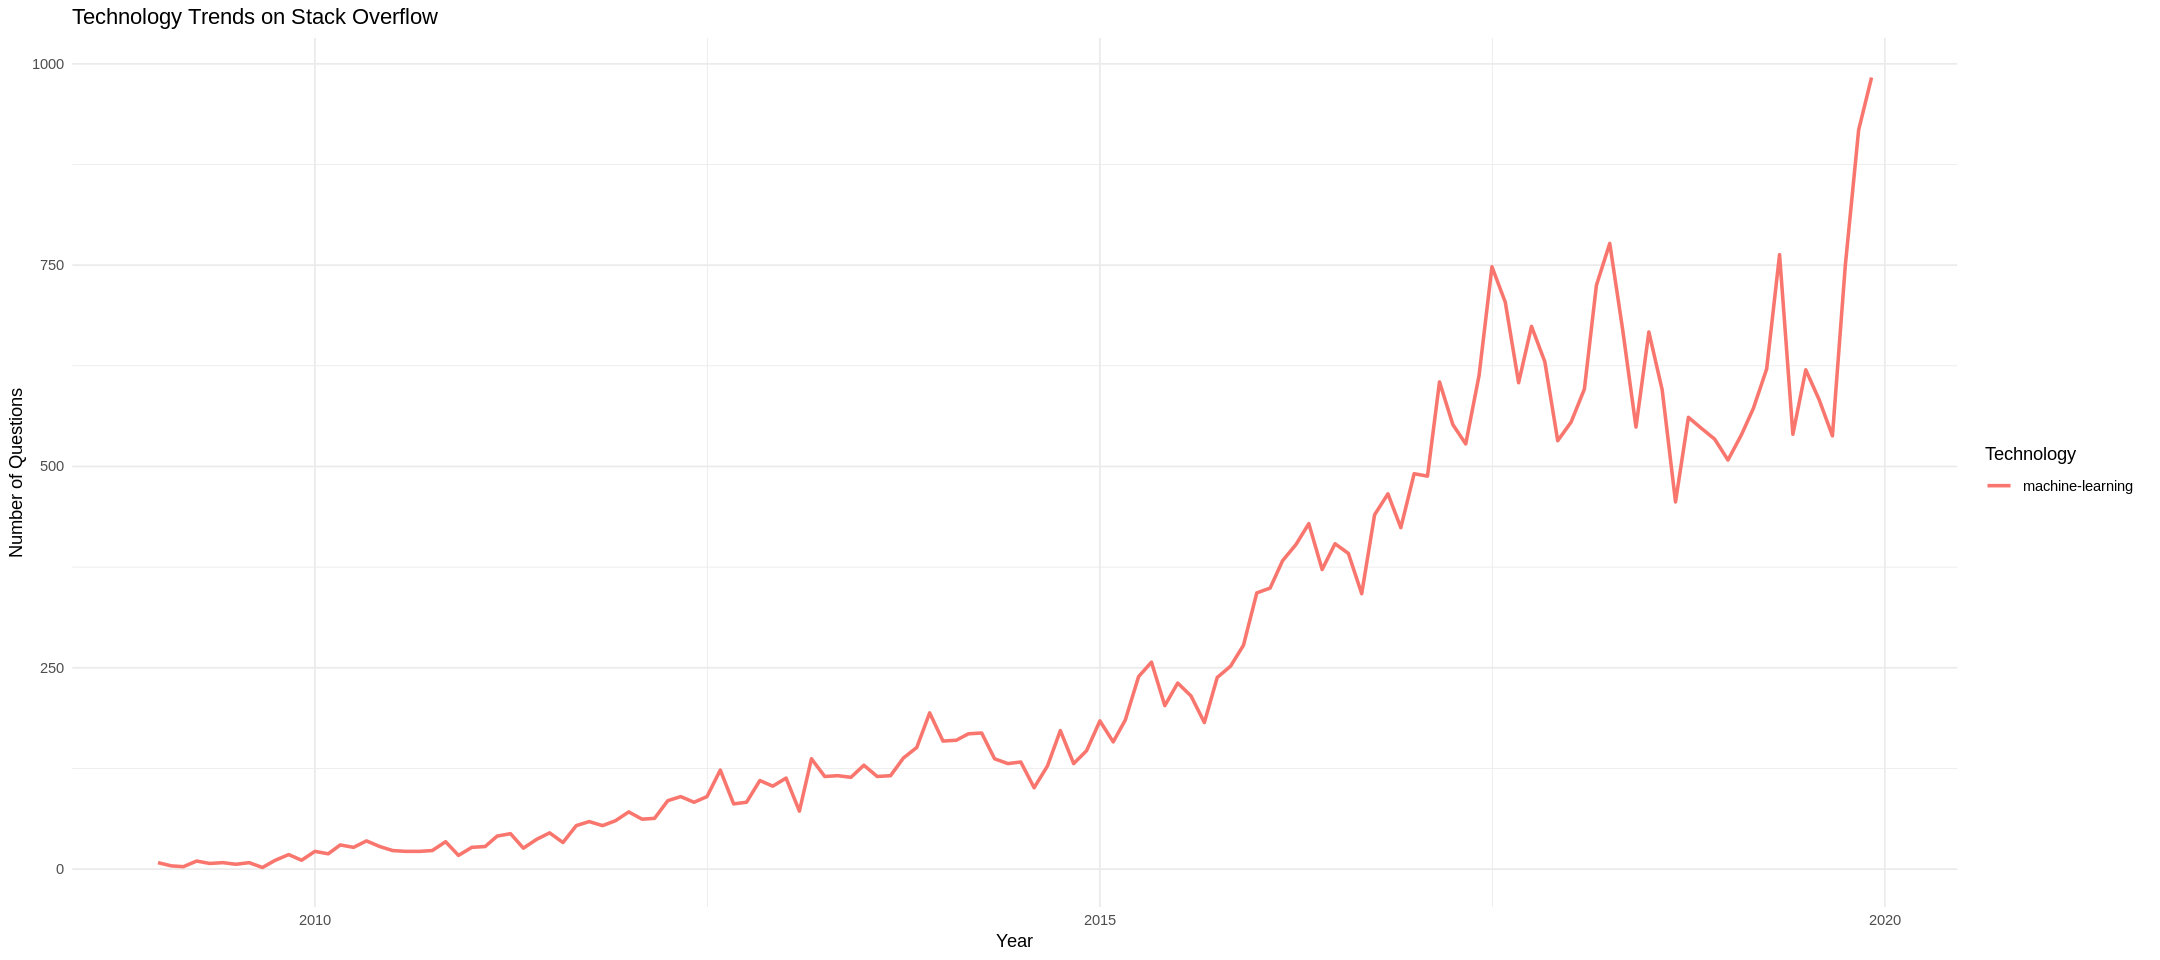

In [8]:
# Reshape data to long format for ggplot
long_data <- pivot_longer(data_ml, cols = -month, names_to = "Technology", values_to = "Count")

options(repr.plot.width=18, repr.plot.height=8)


ggplot(long_data, aes(x = month, y = Count, color = Technology)) +
  geom_line(size = 1) +
  theme_minimal() +
  labs(title = "Technology Trends on Stack Overflow",
       x = "Year",
       y = "Number of Questions",
       color = "Technology") +
  theme(legend.position = "right")


### **Trend**
The plot shows a clear upward trend, with a rapid increase in questions after 2014, reflecting the growing interest in machine learning.


### **Stationarity**
- The series appears to be non-stationary as the mean and variance increase over time.
- To formally assess stationarity, we can perform the **Augmented Dickey-Fuller (ADF) test**.


In [8]:
install.packages('tseries')
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
adf.test(data$`machine-learning`)


	Augmented Dickey-Fuller Test

data:  data$`machine-learning`
Dickey-Fuller = -1.5137, Lag order = 5, p-value = 0.7787
alternative hypothesis: stationary


**Interpretation**: the p-value > 0.05 which means we accept the null hypothesis that is non-stationarity, so our series is non-stationary

### **Variance Analysis**
The fluctuations in the number of questions appear to increase as the values grow, indicating a potential increase in variance over time. This suggests that the data may exhibit **heteroscedasticity**, meaning that variance transformation is needed before applying certain forecasting models.


This dataset exhibits a strong upward trend and non-constant variance, making it non-stationary. Before applying forecasting models, we need to perform the following transformations **Box-Cox transformation** and **differencing** to stabilize the variance and the mean..

#### Before doing any preprocessing, we split the data into train and test, training set is used for modeling, test set is used for forecasting and *evaluation*

In [14]:
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [10]:
ts_data <- ts(data_ml[,2], start = data_ml[1,1], frequency = 1)
train_size <- round(length(ts_data) * 0.95)
train_data <- ts_data[1:train_size]
test_data <- ts_data[(train_size + 1):length(ts_data)]

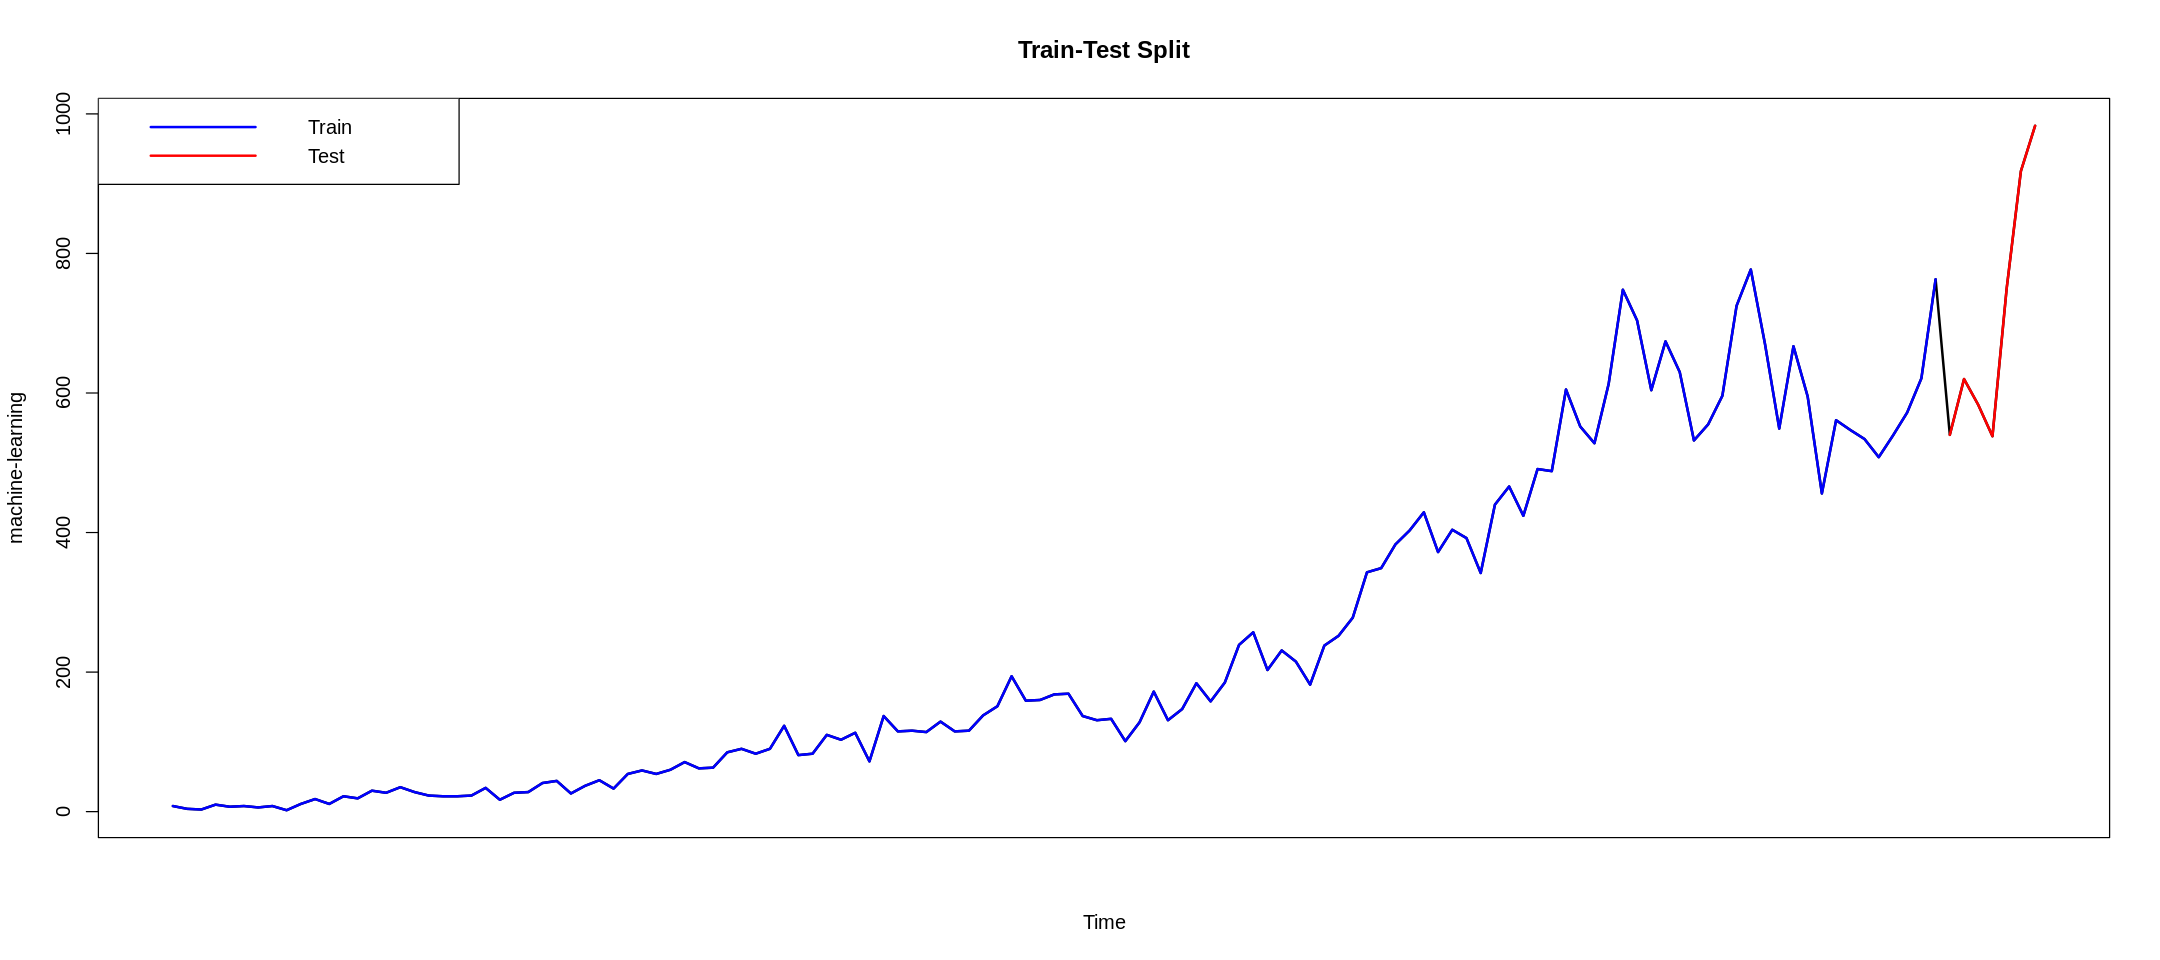

In [16]:
time_index <- time(ts_data)
train_index <- time_index[1:train_size]  # Train time
test_index <- time_index[(train_size + 1):length(ts_data)]  # Test time

# Plot train-test split properly
par(bg='white')
plot(ts_data, col = "black", lwd = 2, main = "Train-Test Split", xaxt = "n")  # Full series without x-axis labels
lines(time_index[1:train_size], train_data, col = "blue", lwd = 2)  # Train data in blue
lines(test_index, test_data, col = "red", lwd = 2)  # Test data in red
legend("topleft", legend = c("Train", "Test"), col = c("blue", "red"), lwd = 2)


# 2. Stabilizing the variance

we stabilize the variance to remove non stationarity in the variance

In [17]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




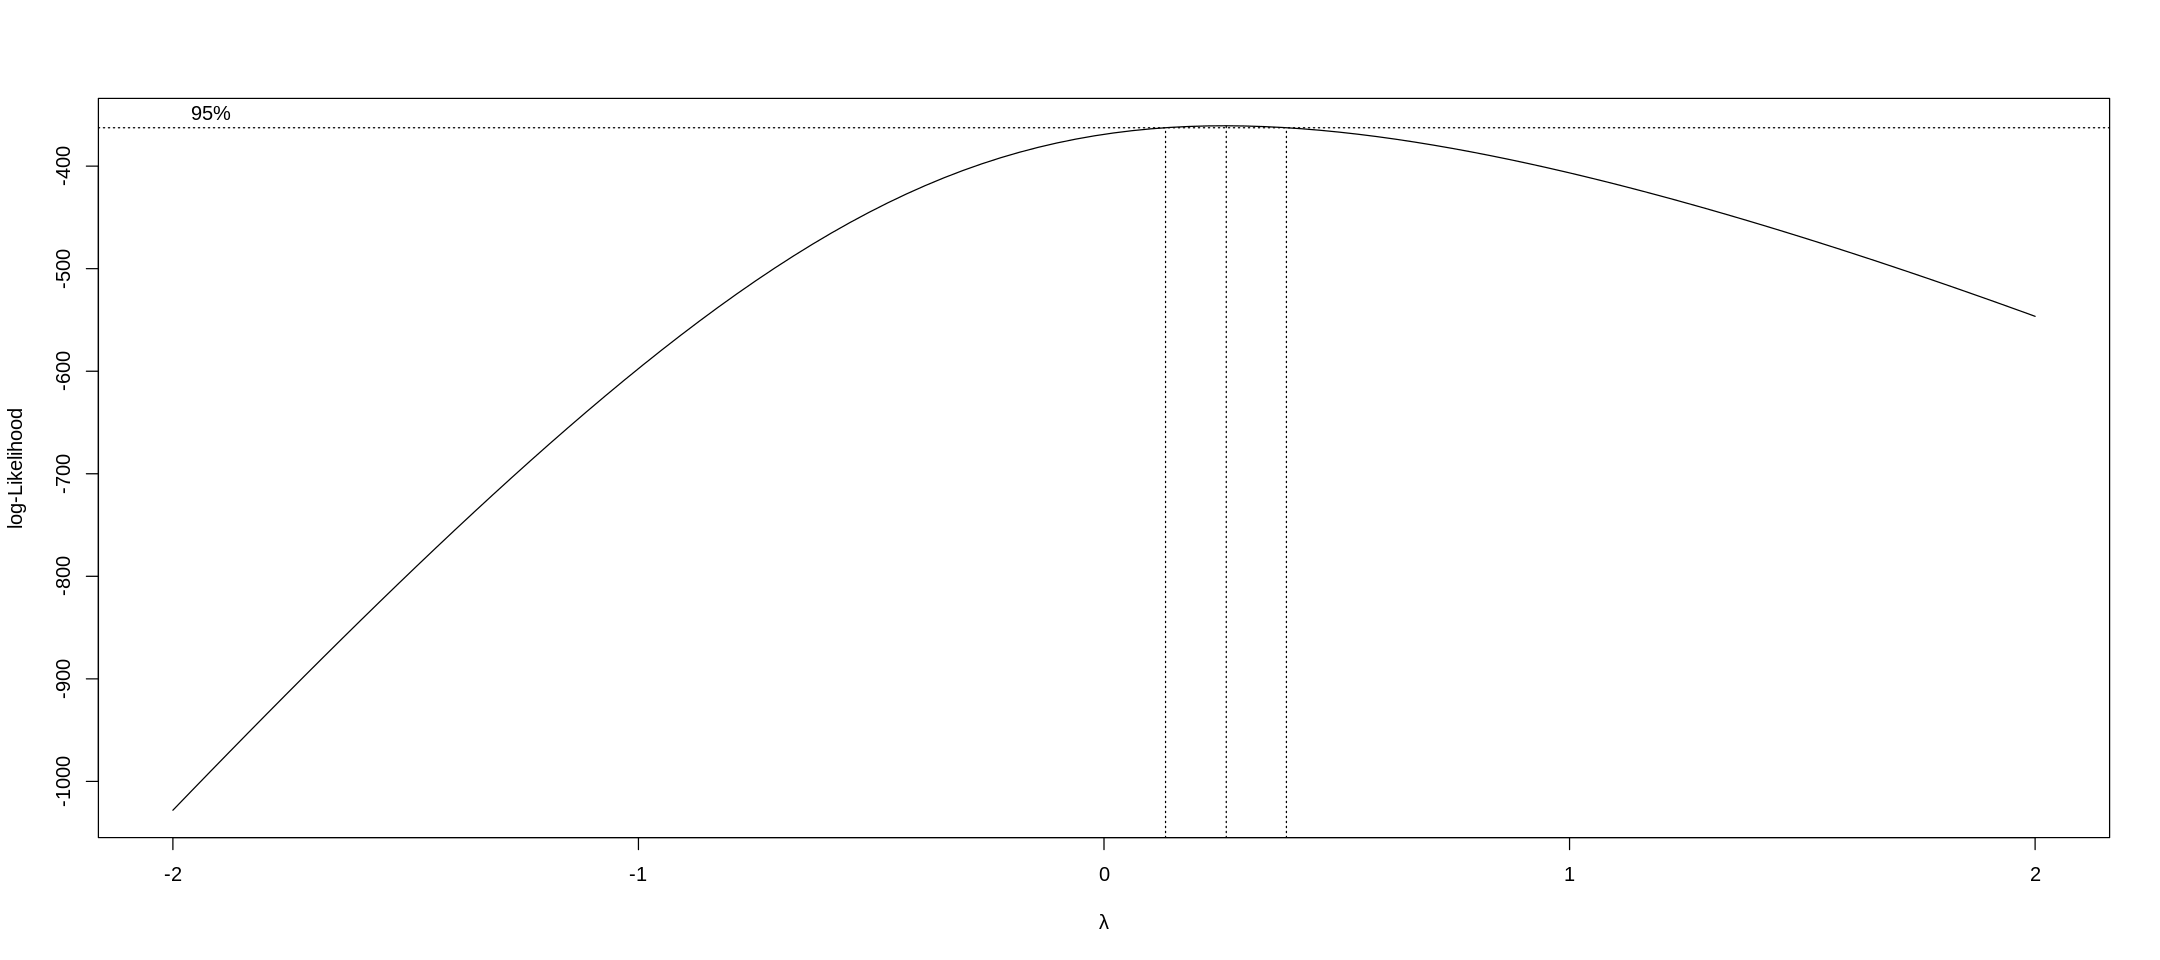

In [19]:

fit <- lm(`machine-learning` ~ 1, data = data_ml)

boxcox(fit, lambda = seq(-2, 2, 0.1))


In [11]:
install.packages('forecast')
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [36]:
lambda <- BoxCox.lambda(data_ml$`machine-learning`)
cat("Value of lambda:", lambda, "\n")

Value of lambda: 0.3355234 


indeed the variance needed stabilizing since lambda is different than 1

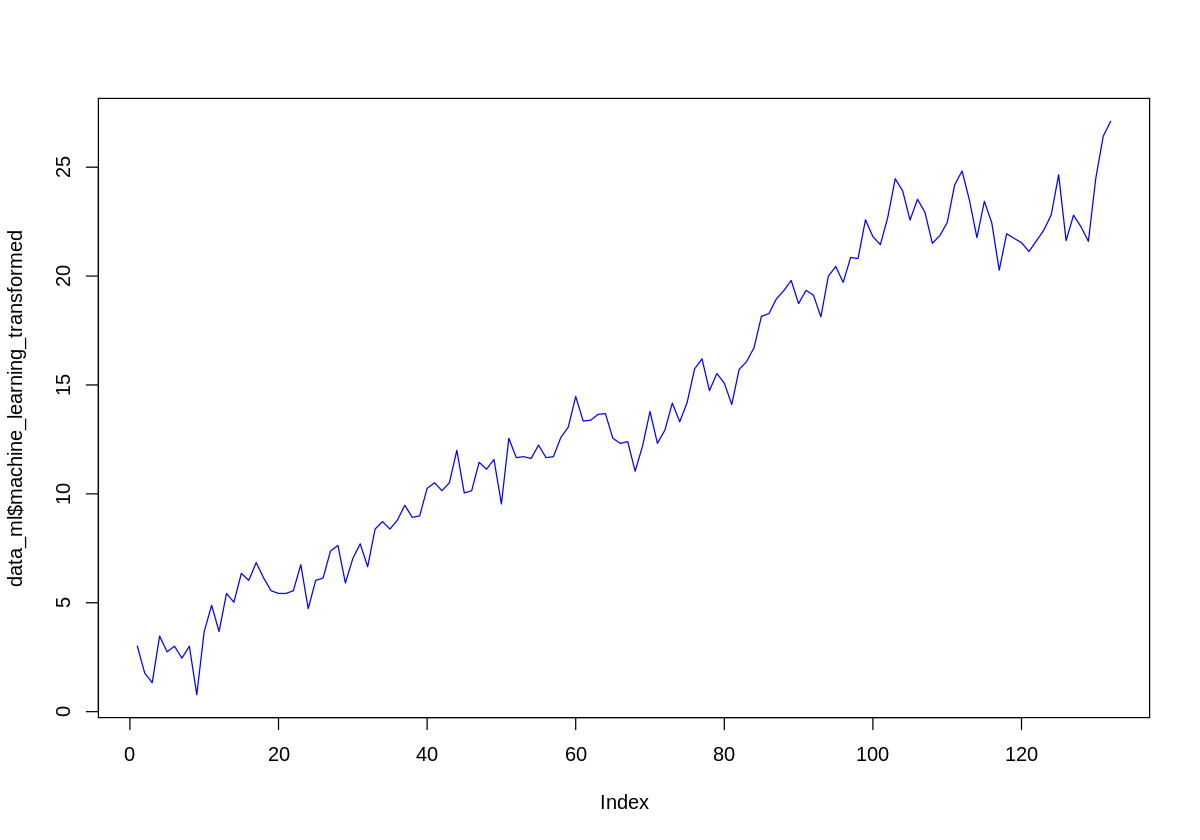

In [37]:
# Apply the Box-Cox transformation
data_ml$machine_learning_transformed <- BoxCox(data_ml$`machine-learning`, lambda)

# Check the transformed data
par(bg = 'white')
plot(data_ml$machine_learning_transformed,type = 'l',col = 'blue')

- the resulting data seems to have a trend, that is it's nonstationary
- we will formally test the stationarity and handle it in the next section

# 3. Applying first differences








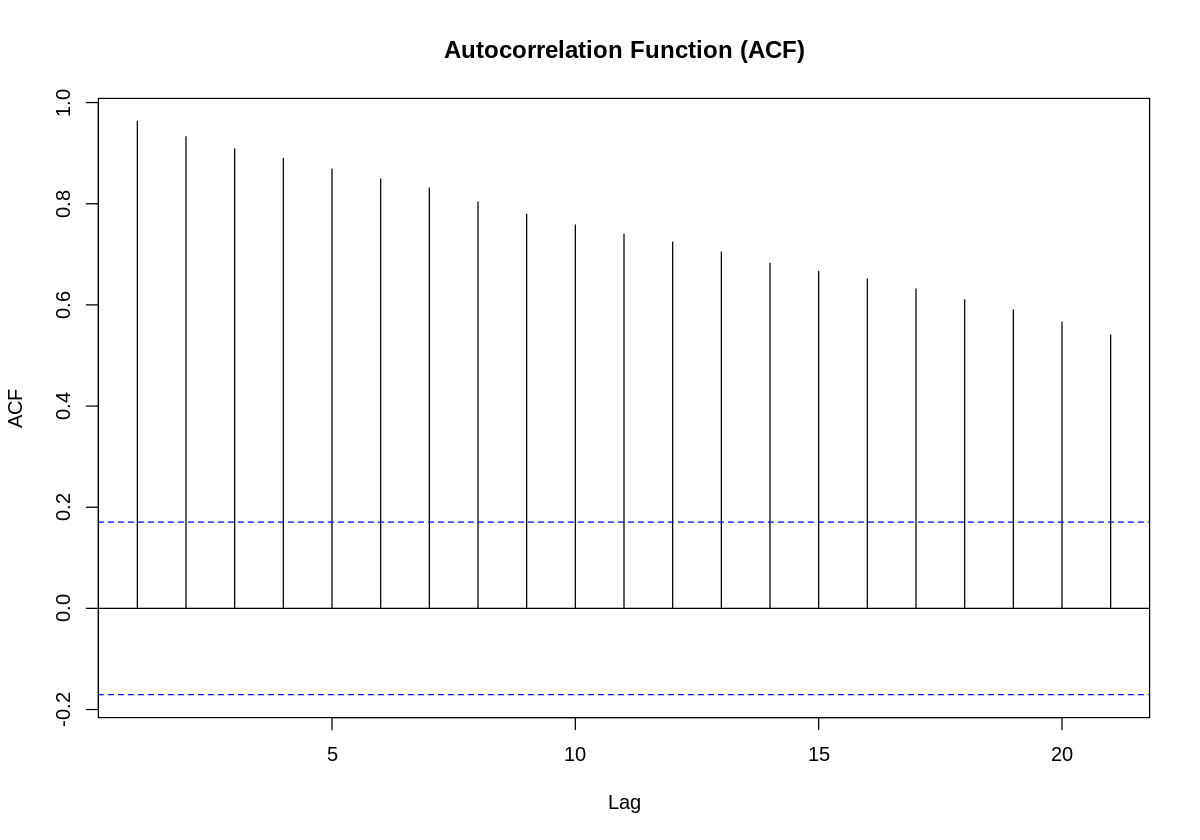

In [38]:
library(forecast)
options(repr.plot.width=10, repr.plot.height=7)

acf(data_ml$machine_learning_transformed, main="Autocorrelation Function (ACF)")

- the ACF is decaying slowly indicating non-stationarity
- we run ADF test on the transformed data to confirm that

In [23]:
library(tseries)

In [39]:
adf.test(data_ml$machine_learning_transformed)


	Augmented Dickey-Fuller Test

data:  data_ml$machine_learning_transformed
Dickey-Fuller = -2.8748, Lag order = 5, p-value = 0.2127
alternative hypothesis: stationary


- **Interpretation** the p-value is bigger than 0.05 so we accept the null hypthesis, therefore the series is non stationnary
- we apply the first differences to remove this non-stationarity

In [40]:
diff_data <- diff(data_ml$machine_learning_transformed, differences = 1)

- we check if the first difference was enough to remove the trend from the data by running the ADF test again

In [41]:
adf.test(diff_data)

Warning message in adf.test(diff_data):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_data
Dickey-Fuller = -5.8547, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


- **Interpretation** the p-value is smaller than 0.05 so we reject the null hypothesis and accept the alternative hypothesis
- therefore after applying the first differences our data is stationary
- hence the candidate ARIMA models will be of the form ARIMA(p,1,q)

# 4. Model selection

- we can see that after the first differences the data became stationary
- now we can induce the model from ACF and PACF and BIC


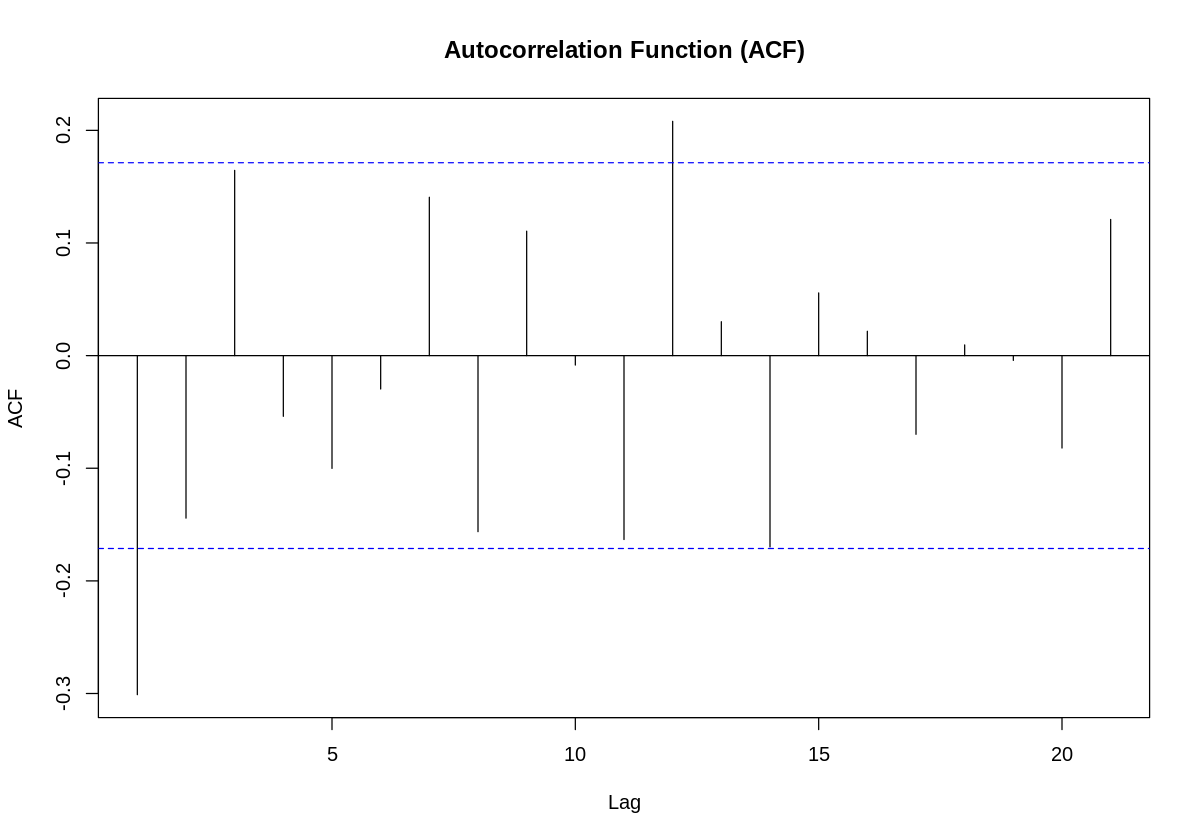

In [42]:
library(forecast)

acf(diff_data, main="Autocorrelation Function (ACF)")

- the ACF is nonzero at lag 1 only
- the spike after lag 10 can be ignored
- this suggest that we have an MA component of order 1

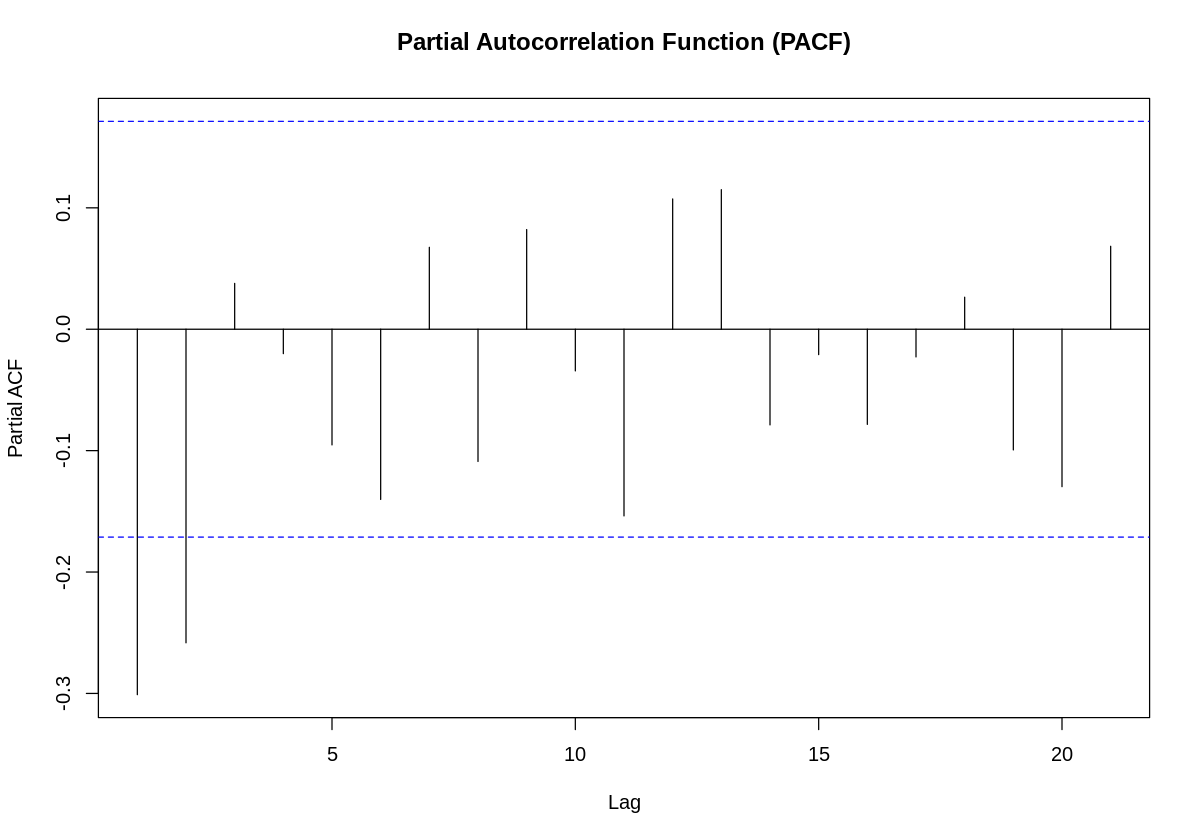

In [43]:
pacf(diff_data, main="Partial Autocorrelation Function (PACF)")

- the PACF is nonzero only at lags 1 and 2
- this suggests we have an AR component of order 2

- both ACF and PACF graphs shows some decay pattern

In [32]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


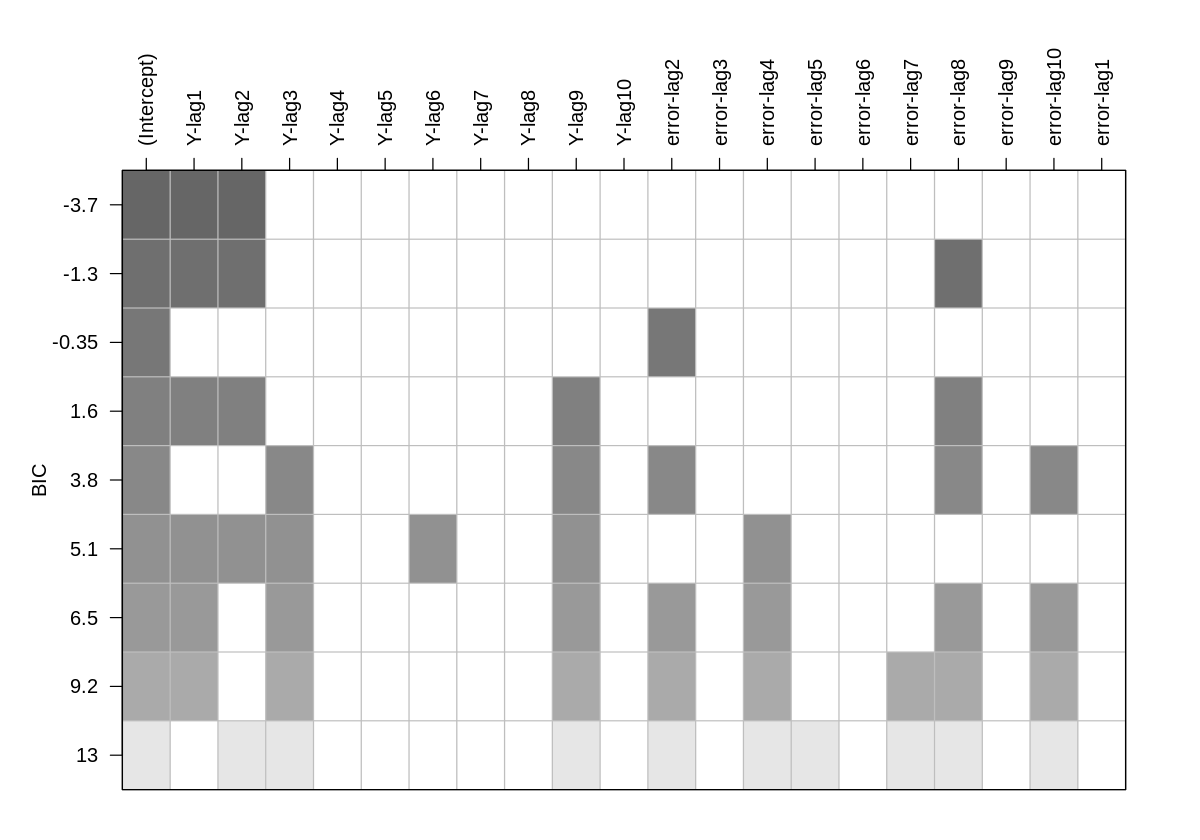

In [44]:
plot(armasubsets(y = diff_data, nar = 10, nma = 10))

- from the BIC, we have an AR(2) model

From the ACF, PACF and BIC we have the following candidates model:
- From the BIC graph ARIMA(2,1,0)
- From the ACF and PACF: ARIMA(2,1,1)

# 5. Fitting the candidate models

In [45]:
train_size <- floor(0.95 * nrow(data_ml))

ml_train <- data_ml[1:train_size, ]
ml_forecast <- data_ml[(train_size + 1):nrow(data_ml), ]

In [54]:
model_210 <- arima(ml_train$machine_learning_transformed, order=c(2,1,0))
model_211 <- arima(ml_train$machine_learning_transformed, order=c(2,1,1))

we take also the model proposed by auto-arima for comparison

In [47]:
auto.arima(ml_train$machine_learning_transformed)

Series: ml_train$machine_learning_transformed 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.4700  0.1722
s.e.   0.0867  0.0478

sigma^2 = 1.01:  log likelihood = -175.68
AIC=357.35   AICc=357.55   BIC=365.81

In [55]:
model_011 <- arima(ml_train$machine_learning_transformed, order=c(0,1,1))

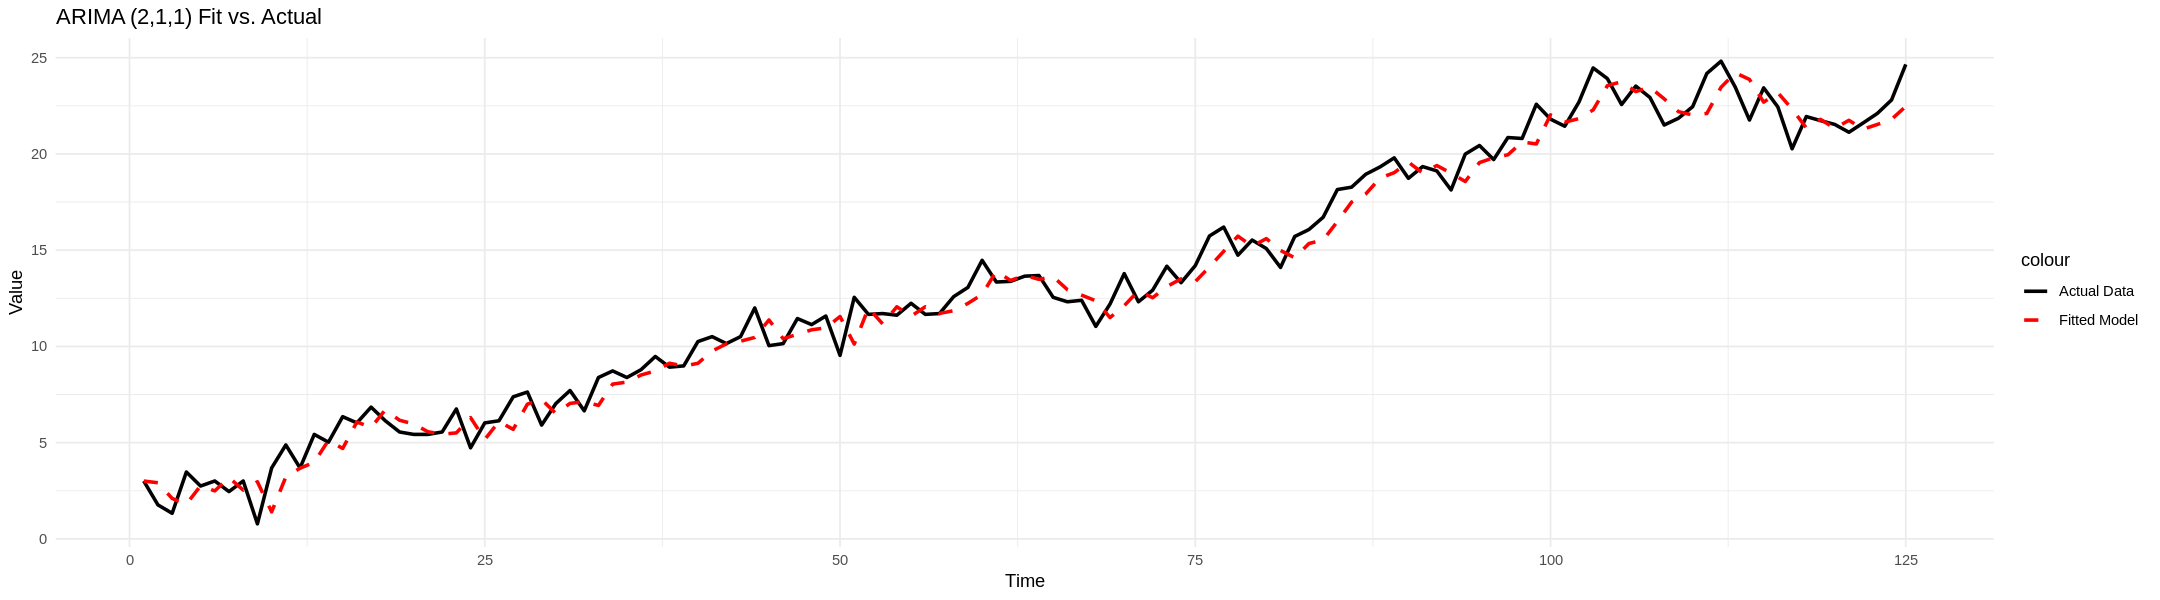

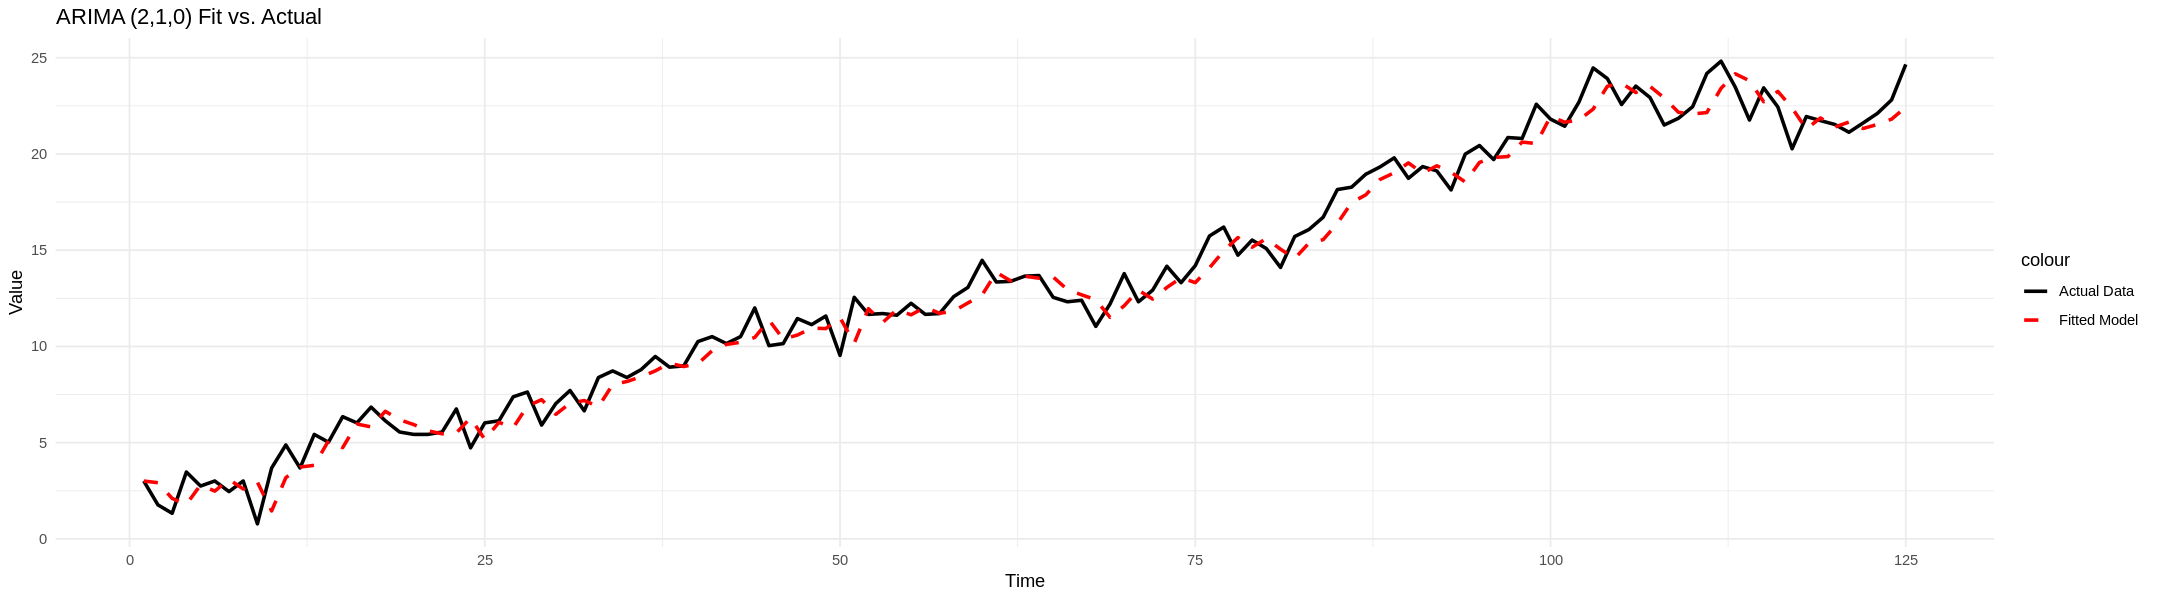

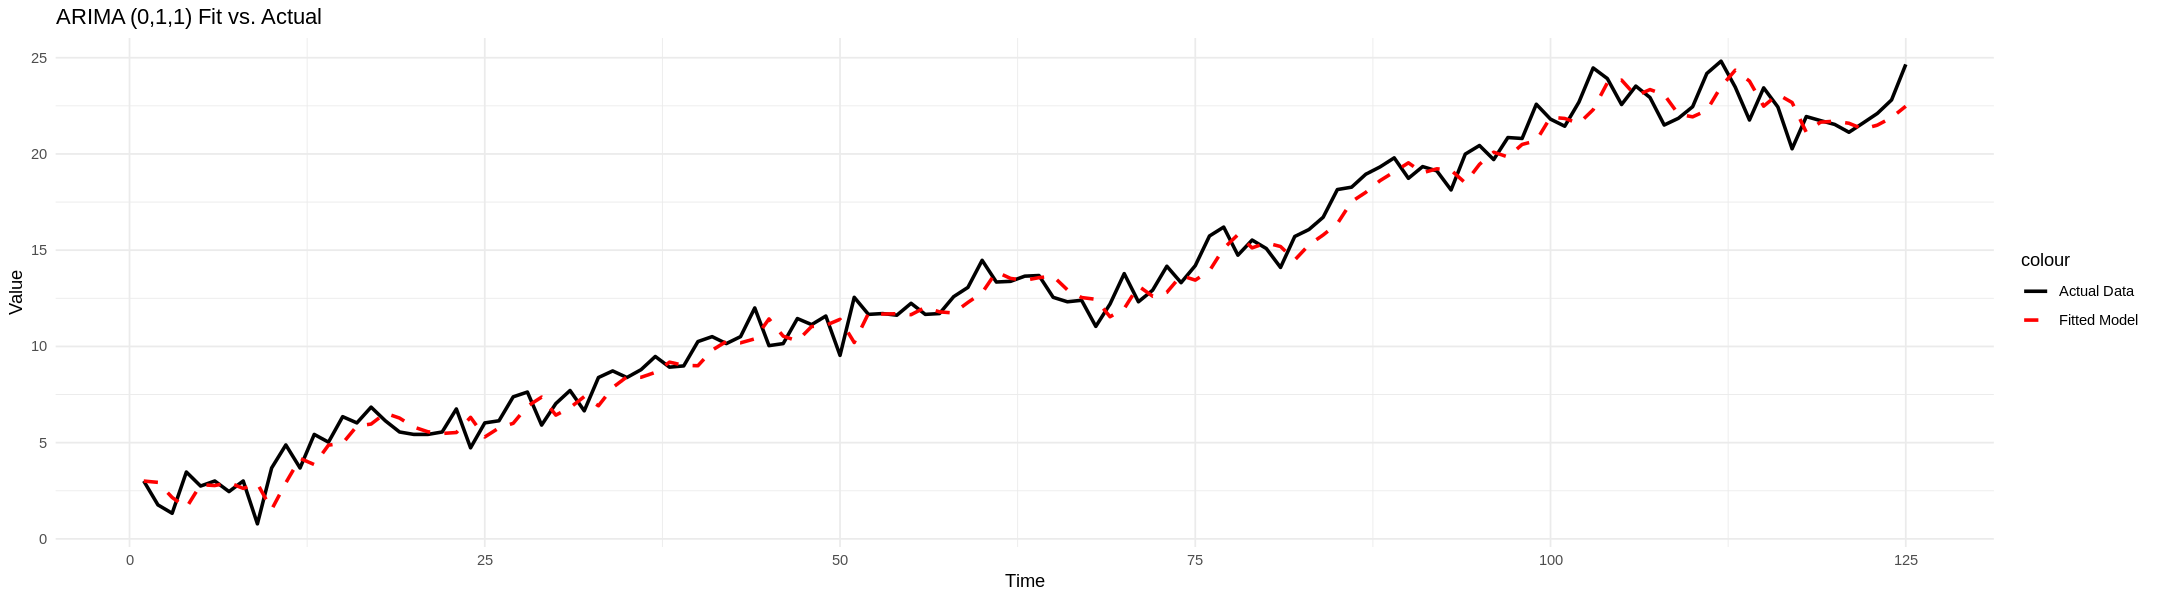

In [56]:
# Create a time index if not already available
time_index <- seq_along(ml_train$machine_learning_transformed)

# Convert fitted values to data frames
df_211 <- data.frame(Time = time_index, Actual = ml_train$machine_learning_transformed, Fitted = fitted(model_211))
df_210 <- data.frame(Time = time_index, Actual = ml_train$machine_learning_transformed, Fitted = fitted(model_210))
df_011 <- data.frame(Time = time_index, Actual = ml_train$machine_learning_transformed, Fitted = fitted(model_011))


# Function to create individual plots
plot_fit <- function(df, model_name) {
  ggplot(df, aes(x = Time)) +
    geom_line(aes(y = Actual, color = "Actual Data"), size = 1) +
    geom_line(aes(y = Fitted, color = "Fitted Model"), linetype = "dashed", size = 1) +
    ggtitle(paste("ARIMA", model_name, "Fit vs. Actual")) +
    ylab("Value") + xlab("Time") +
    scale_color_manual(values = c("Actual Data" = "black", "Fitted Model" = "red")) +
    theme_minimal()
}

options(repr.plot.width=18, repr.plot.height=5)

# Run each line separately in R to see them as separate plots
plot_fit(df_211, "(2,1,1)")
plot_fit(df_210, "(2,1,0)")
plot_fit(df_011, "(0,1,1)")


- looking at these graphs, the candidate models give good fit of the data

# 6. Model evaluation

Now to test which models fits the data the best we use the following criteria
1. BIC and AIC values
2. Residual diagnostics
3. Forecasting performance

#### a. BIC and AIC values

In [49]:
   results <- data.frame(
     Model = c("ARIMA(2,1,0)", "ARIMA(2,1,1)", "ARIMA(0,1,1)"),
     AIC = c(AIC(model_210), AIC(model_211), AIC(model_011)),
     BIC = c(BIC(model_210), BIC(model_211), BIC(model_011))
   )
   print("Model Comparison Criteria:")
   print(results)

[1] "Model Comparison Criteria:"
         Model      AIC      BIC
1 ARIMA(2,1,0) 363.6305 372.0913
2 ARIMA(2,1,1) 365.0825 376.3636
3 ARIMA(0,1,1) 365.4488 371.0894


- we can see that the model ARIMA(2,1,0) is the best in terms of AIC and BIC since it has the lowest values

#### b. Resiudal diagnostics

check if the residuals are
- normally distributed with zero mean
- independent ( not correlated )

In [28]:
residuals_211 <- residuals(model_211)
residuals_210 <- residuals(model_210)
residuals_011 <- residuals(model_011)

In [29]:
# Load required libraries
library(ggplot2)
install.packages('gridExtra')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


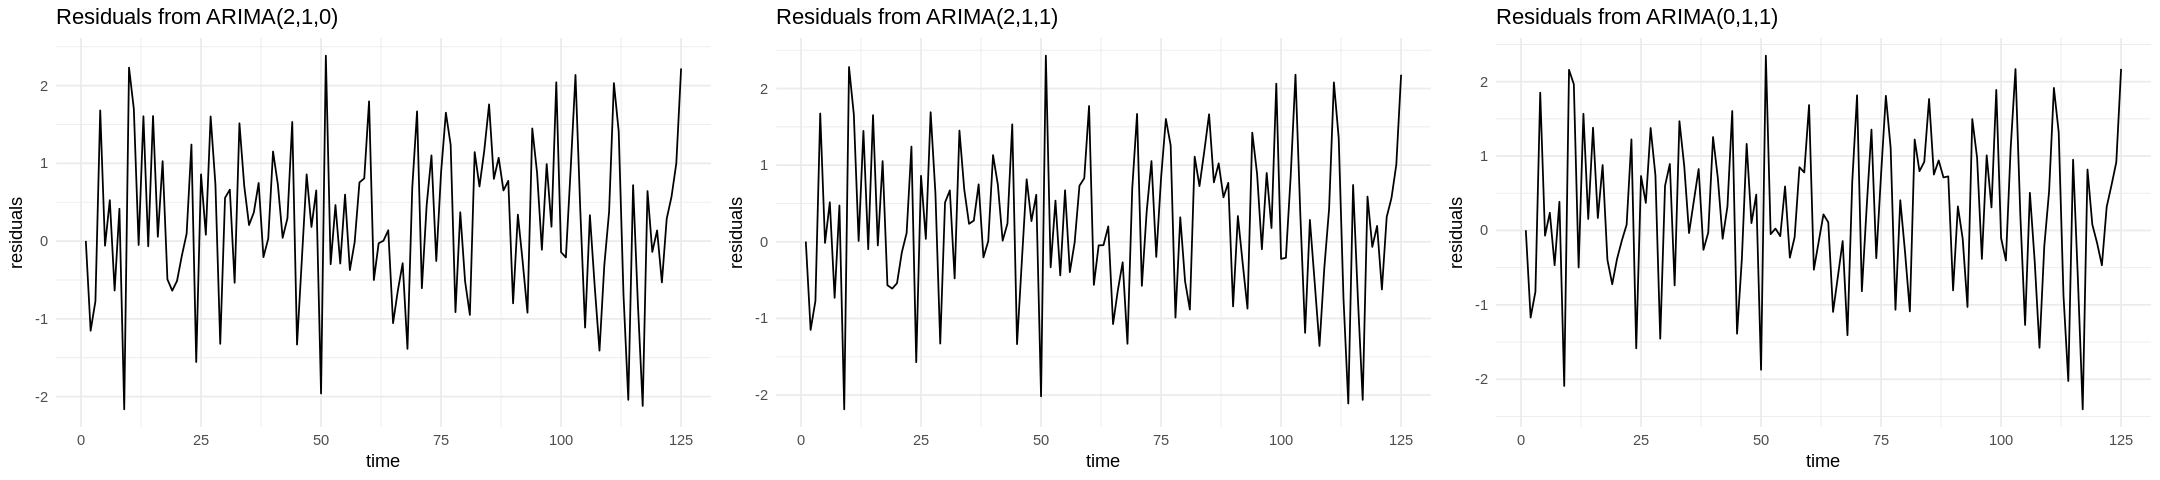

In [30]:
data_210 <- data.frame(time = 1:length(residuals_210), residuals = residuals_210)
data_211 <- data.frame(time = 1:length(residuals_211), residuals = residuals_211)
data_011 <- data.frame(time = 1:length(residuals_011), residuals = residuals_011)

options(repr.plot.width=18, repr.plot.height=4)


# Create individual residual plots
p1 <- ggplot(data_210, aes(x = time, y = residuals)) +
  geom_line(color = "black") +
  ggtitle("Residuals from ARIMA(2,1,0)") +
  theme_minimal()

p2 <- ggplot(data_211, aes(x = time, y = residuals)) +
  geom_line(color = "black") +
  ggtitle("Residuals from ARIMA(2,1,1)") +
  theme_minimal()

p3 <- ggplot(data_011, aes(x = time, y = residuals)) +
  geom_line(color = "black") +
  ggtitle("Residuals from ARIMA(0,1,1)") +
  theme_minimal()

# Arrange the plots side by side
grid.arrange(p1, p2, p3, ncol = 3)

- plotting the residuals of the three models, they seem to resemble a zero mean white noise

**Assessing residuals normality** we can use
- shapiro wilk test
- QQplot
- histogram overlayed with pdf of normal distribution

In [31]:
# Perform Shapiro-Wilk test
shapiro.test(residuals_210)
shapiro.test(residuals_211)
shapiro.test(residuals_011)


	Shapiro-Wilk normality test

data:  residuals_210
W = 0.9906, p-value = 0.5588



	Shapiro-Wilk normality test

data:  residuals_211
W = 0.99101, p-value = 0.598



	Shapiro-Wilk normality test

data:  residuals_011
W = 0.99067, p-value = 0.5649


- by using shapiro wilk test, the residuals of all models seems to follow the normal distribution however the model ARIMA(2,1,1) has the highest p-value suggesting it is the closest to the normal distribution
- we can draw histograms and QQplot to visually assess normality furthermore

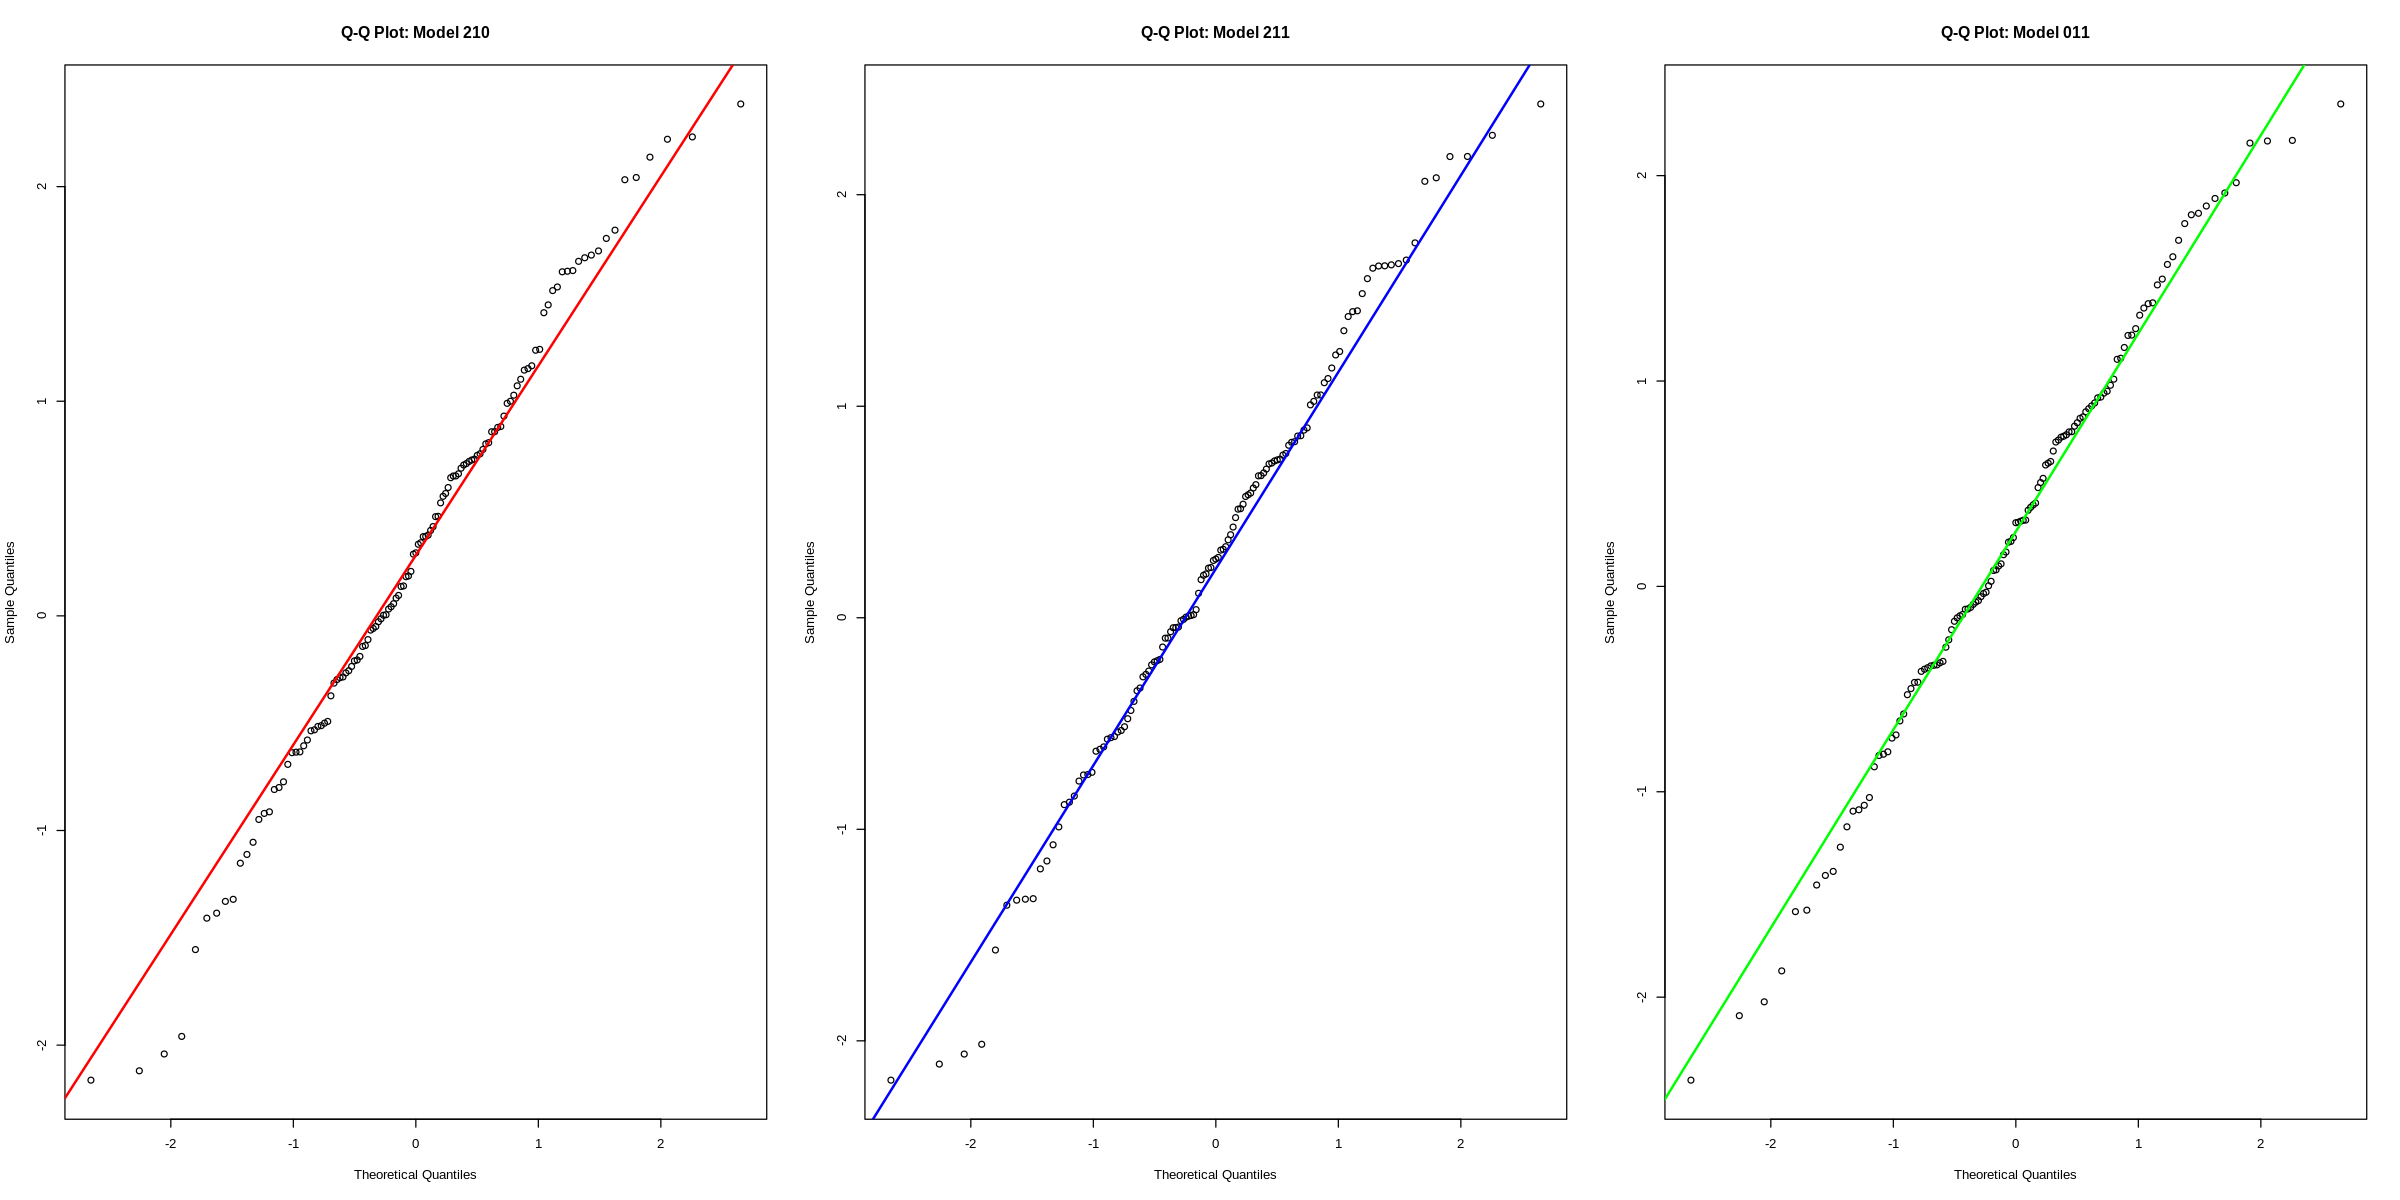

In [32]:
par(mfrow=c(1,3))
options(repr.plot.width=20, repr.plot.height=10)


# First Q-Q Plot
qqnorm(residuals_210, main="Q-Q Plot: Model 210")
qqline(residuals_210, col="red", lwd=2)

# Second Q-Q Plot
qqnorm(residuals_211, main="Q-Q Plot: Model 211")
qqline(residuals_211, col="blue", lwd=2)

# Third Q-Q Plot
qqnorm(residuals_011, main="Q-Q Plot: Model 011")
qqline(residuals_011, col="green", lwd=2)

par(mfrow=c(1,1))

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


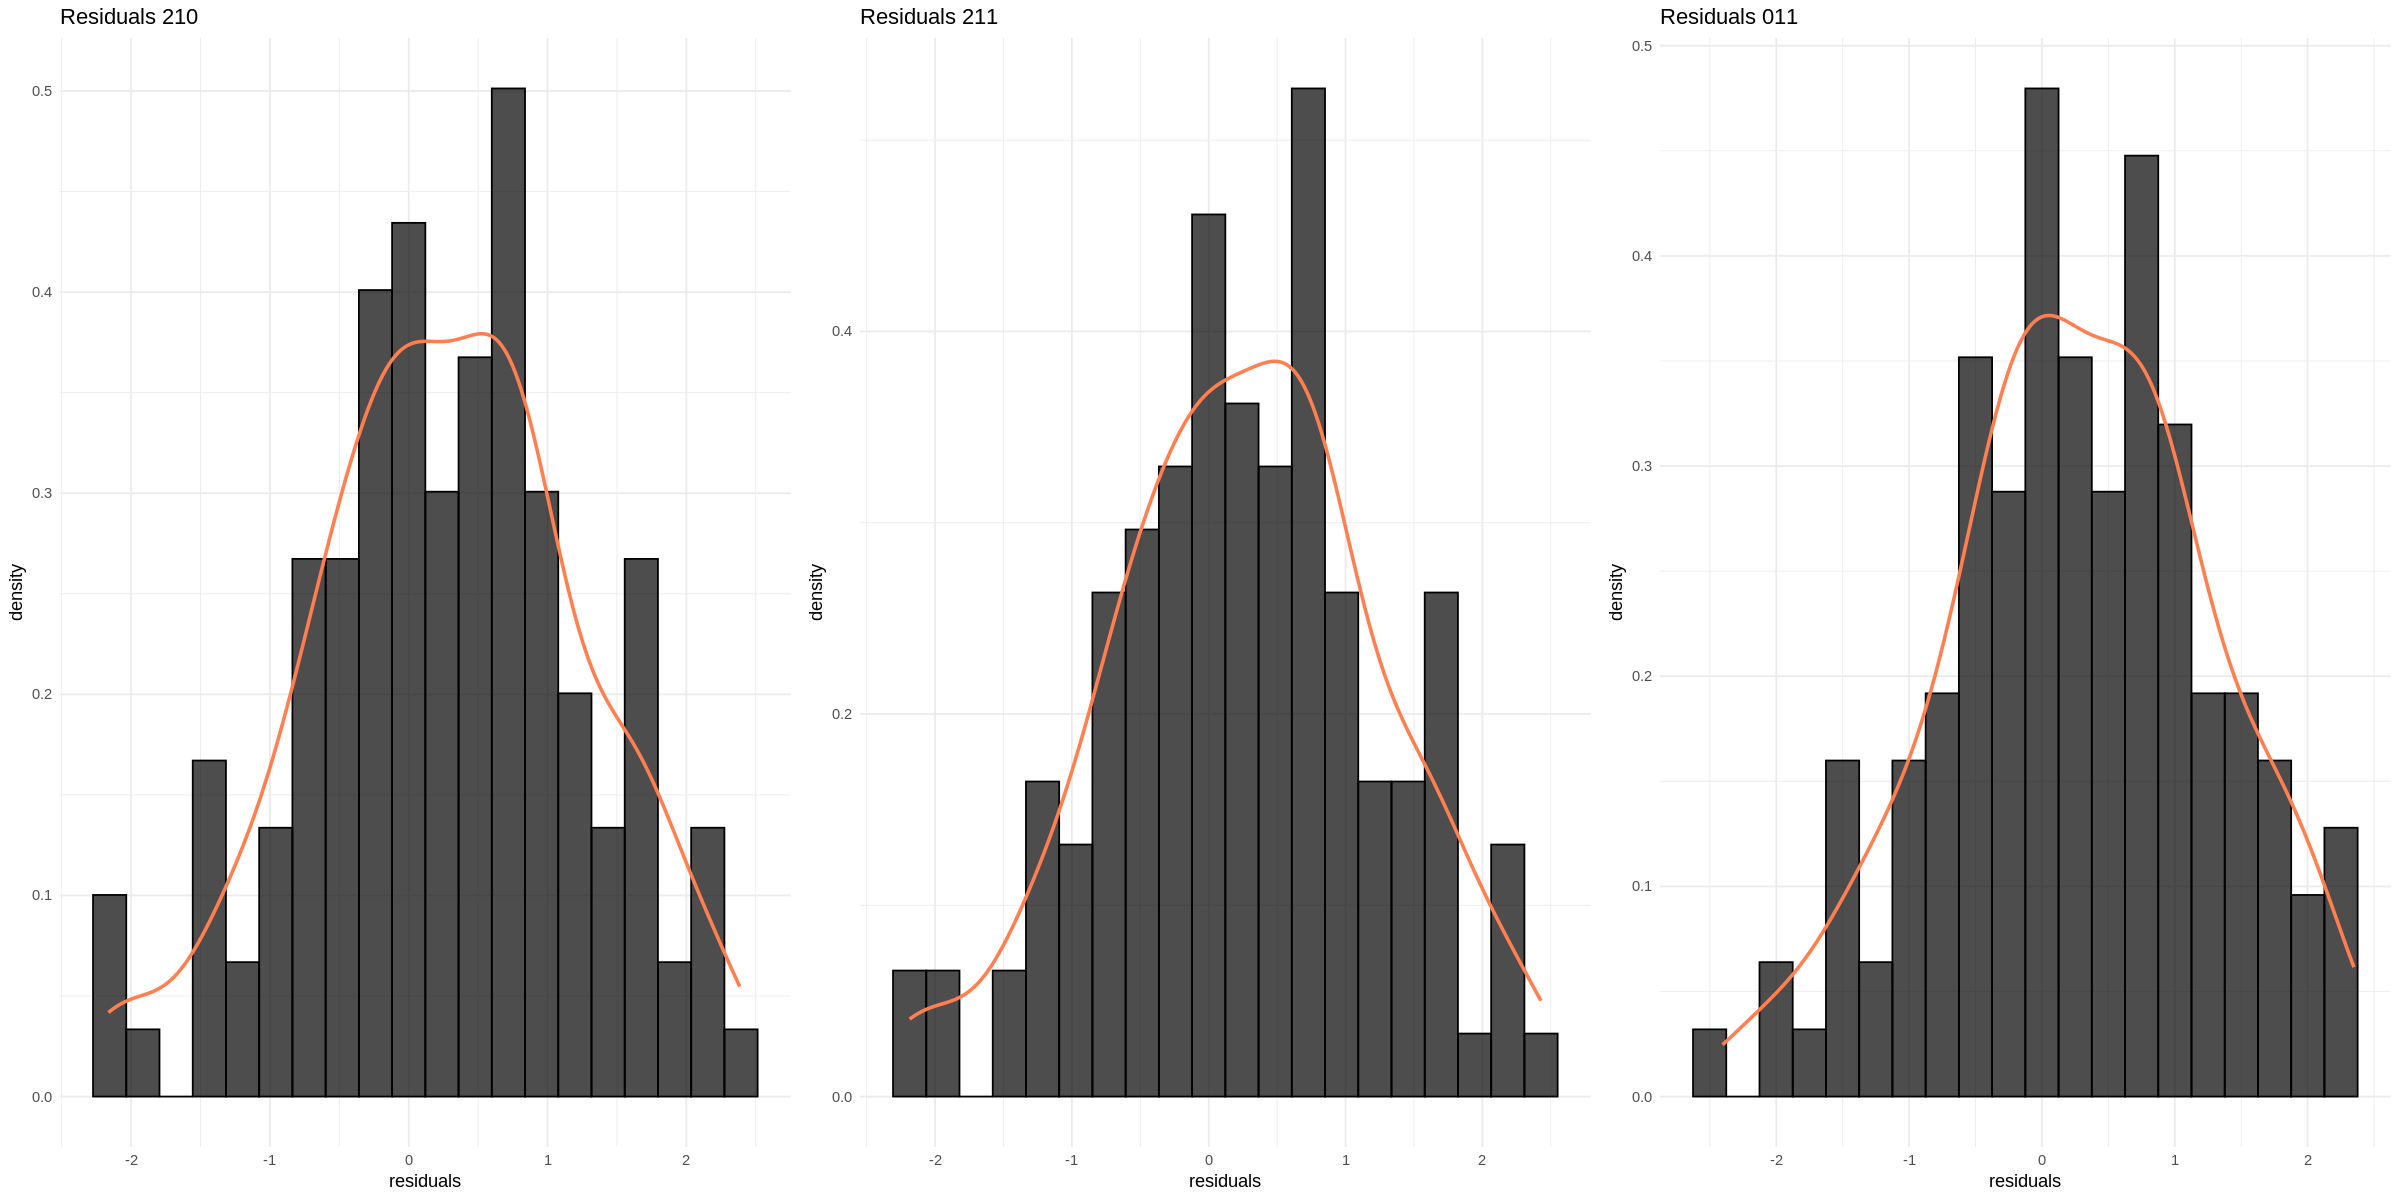

In [33]:

data_210 <- data.frame(residuals = residuals_210)
data_211 <- data.frame(residuals = residuals_211)
data_011 <- data.frame(residuals = residuals_011)

# Create individual plots
p1 <- ggplot(data_210, aes(x = residuals)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "black", color = "black", alpha = 0.7) +
  geom_density(color = "coral", size = 1) +
  ggtitle("Residuals 210") +
  theme_minimal()

p2 <- ggplot(data_211, aes(x = residuals)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "black", color = "black", alpha = 0.7) +
  geom_density(color = "coral", size = 1) +
  ggtitle("Residuals 211") +
  theme_minimal()

p3 <- ggplot(data_011, aes(x = residuals)) +
  geom_histogram(aes(y = ..density..), bins = 20, fill = "black", color = "black", alpha = 0.7) +
  geom_density(color = "coral", size = 1) +
  ggtitle("Residuals 011") +
  theme_minimal()

# Arrange the plots side by side
grid.arrange(p1, p2, p3, ncol = 3)

- from these graphs, we can say that residuals for all three models are normally distributed

**Assessing independece** we can use
- runs test
- Ljung box test
- ACF plot

In [34]:
# Load necessary libraries
install.packages("randtests")
library(randtests)

library(ggplot2)
install.packages('patchwork')
library(patchwork)  # For side-by-side plotting
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘randtests’


The following object is masked from ‘package:tseries’:

    runs.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘patchwork’


The following object is masked from ‘package:MASS’:

    area




##### ACF plots

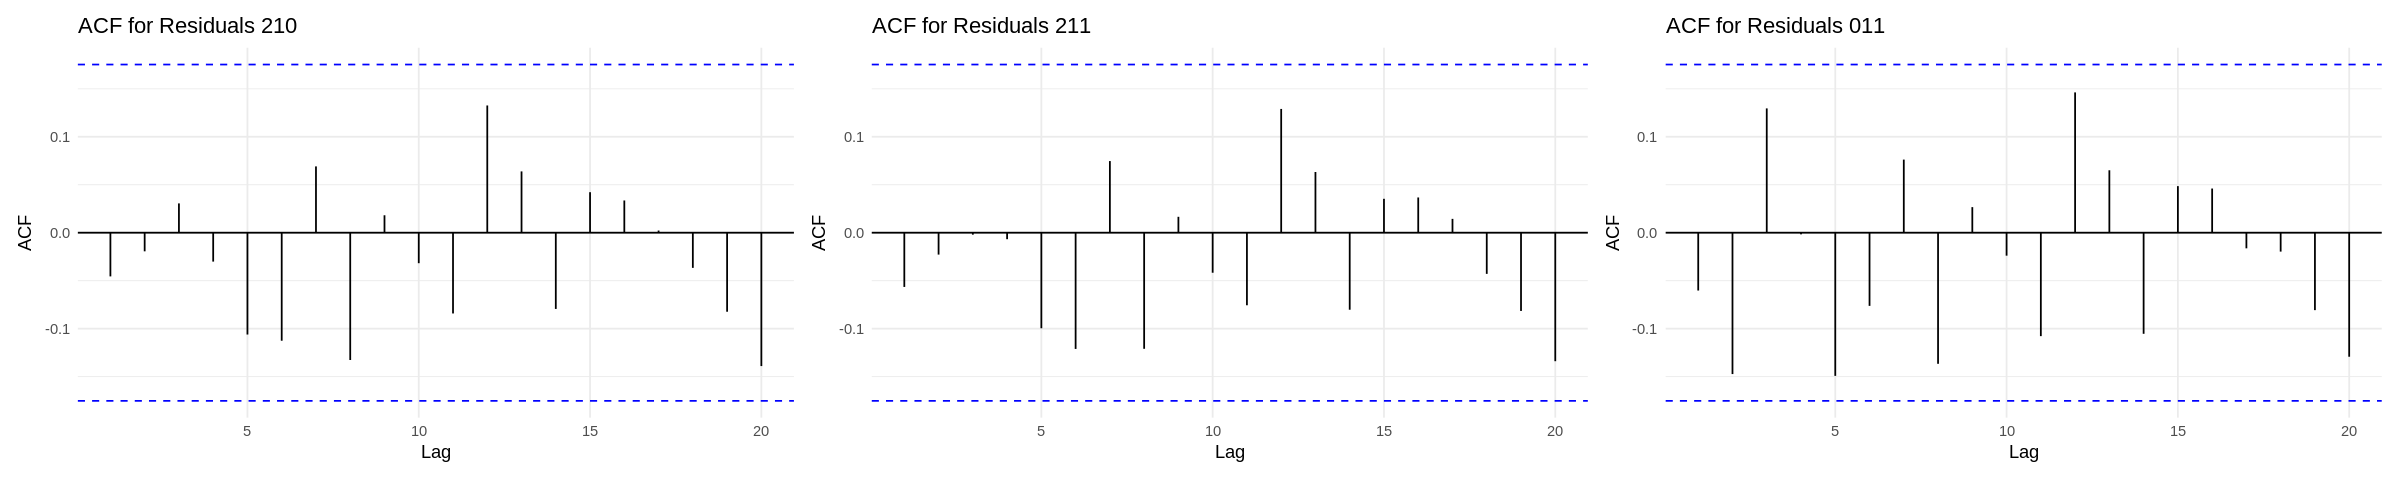

In [35]:
# Set plot size
options(repr.plot.width=20, repr.plot.height=4)

# Function to create ACF plot
plot_acf <- function(residuals, title) {
  ggAcf(residuals) +
    ggtitle(title) +
    theme_minimal()
}

# Create ACF plots for the three residuals
plot1 <- plot_acf(residuals_210, "ACF for Residuals 210")
plot2 <- plot_acf(residuals_211, "ACF for Residuals 211")
plot3 <- plot_acf(residuals_011, "ACF for Residuals 011")

# Stack the plots vertically
plot1 + plot2 + plot3


- ACF of all residuals idicate that the residuals for each model are uncorrelated
- a formal test like Ljung Box will confirm this



###### Ljung Box test

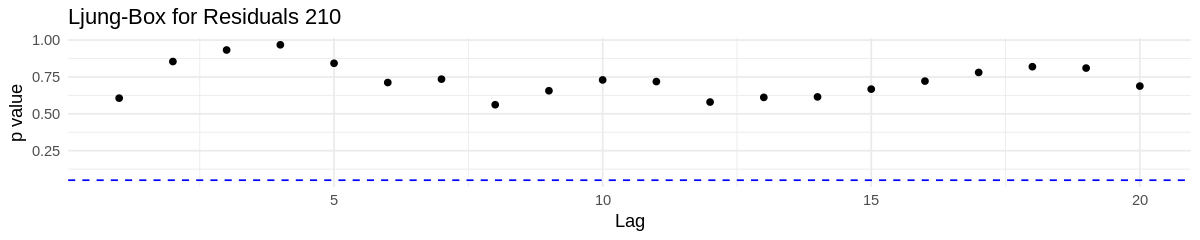

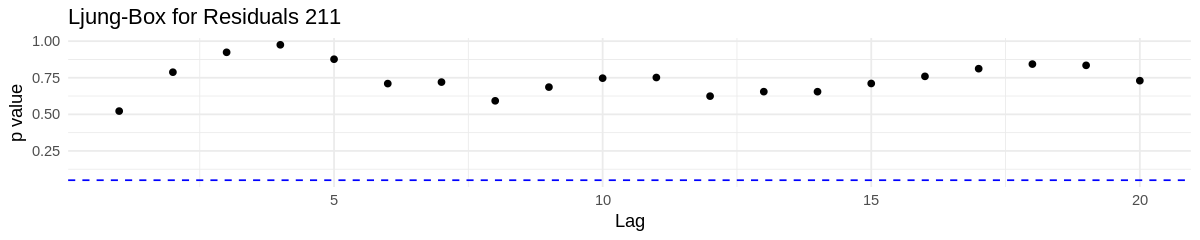

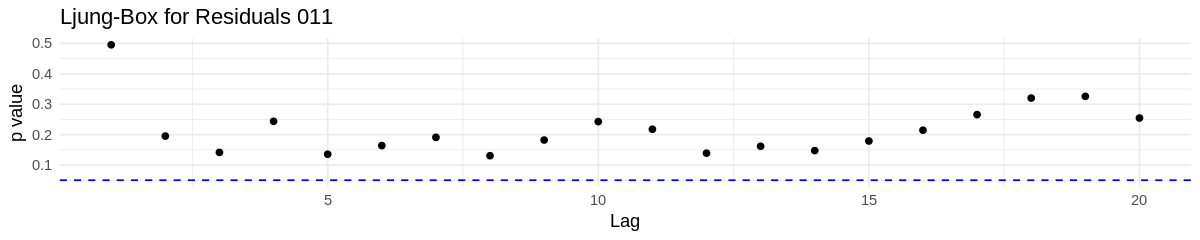

In [36]:
# Set plot size
options(repr.plot.width=10, repr.plot.height=2)

# Function to compute Ljung-Box p-values and create the plot
plot_ljung_box <- function(residuals, title) {
  lags <- 1:20  # Define the range of lags
  p_values <- sapply(lags, function(lag) Box.test(residuals, lag = lag, type = "Ljung-Box")$p.value)

  # Create a dataframe for plotting
  ljung_box_df <- data.frame(lags, p_values)

  # Generate the plot
  ggplot(ljung_box_df, aes(x = lags, y = p_values)) +
    geom_point() +
    geom_hline(yintercept = 0.05, linetype = "dashed", color = "blue") +
    theme_minimal() +
    labs(title = title, x = "Lag", y = "p value")
}

# Create plots for all three residuals
plot1 <- plot_ljung_box(residuals_210, "Ljung-Box for Residuals 210")
plot2 <- plot_ljung_box(residuals_211, "Ljung-Box for Residuals 211")
plot3 <- plot_ljung_box(residuals_011, "Ljung-Box for Residuals 011")

# Display the three plots side by side
plot1
plot2
plot3


**all p-values > 0.05 indicates non-correlation**

###### Runs test

In [37]:
# Perform the Runs Test
runs.test(residuals_210)
runs.test(residuals_211)
runs.test(residuals_011)


	Runs Test

data:  residuals_210
statistic = 1.6231, runs = 72, n1 = 62, n2 = 62, n = 124, p-value =
0.1046
alternative hypothesis: nonrandomness



	Runs Test

data:  residuals_211
statistic = 1.6231, runs = 72, n1 = 62, n2 = 62, n = 124, p-value =
0.1046
alternative hypothesis: nonrandomness



	Runs Test

data:  residuals_011
statistic = 0.18034, runs = 64, n1 = 62, n2 = 62, n = 124, p-value =
0.8569
alternative hypothesis: nonrandomness


- the p-value for all residuals in runs test exceed 0.05
- residuals are independent

###### Conclusion

after doing residual diagnosis for the three candidate models, we find that all of them represent a zero mean white noise with the model ARIMA(0,1,1) being slighlty better in terms of residuals being independent, and the model ARIMA(2,1,1) in terms of residuals being normally distributed

#### c. Forecasting performance

In [57]:
train <- ml_train[, c("month","machine_learning_transformed")]
test <- ml_forecast[, c("month","machine_learning_transformed")]

forecast on the transformed data

In [58]:
predictions210 <- predict(model_210, n.ahead = 7)
predictions211 <- predict(model_211, n.ahead = 7)
predictions011 <- predict(model_011, n.ahead = 7)

apply inverse box cox on the forecasted data

In [61]:
final_forecast210 <- InvBoxCox(predictions210$pred, lambda)
final_forecast211 <- InvBoxCox(predictions211$pred, lambda)
final_forecast011 <- InvBoxCox(predictions011$pred, lambda)

In [59]:
cat("Accuracy for predictions011:\n")
accuracy(final_forecast011, test$machine_learning_transformed)

cat("\nAccuracy for predictions210:\n")
accuracy(final_forecast210, test$machine_learning_transformed)

cat("\nAccuracy for predictions211:\n")
accuracy(final_forecast211, test$machine_learning_transformed)

Accuracy for predictions011:


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.1221371,2.114884,1.945154,-1.282208,8.146312



Accuracy for predictions210:


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.06971037,2.106303,1.924745,-1.057665,8.047068



Accuracy for predictions211:


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.1437781,2.105777,1.93337,-1.369941,8.107657


- we can see that the three models are performing well

- All models have small ME values close to zero, indicating that there is no significant systematic bias (i.e., they are not consistently overestimating or underestimating). However, ARIMA(2,1,0) has the smallest ME (-0.0697), meaning it has the least bias among the three.

- RMSE measures overall error magnitude. Its values are quite close across the three models (~2.10), meaning all models have similar total error levels


##### Conclusion

- ARIMA(2,1,0) is the best-performing model overall based on the lowest RMSE, MAE, MAPE, and ME, meaning it provides the most accurate and least biased predictions.

- ARIMA(0,1,1) and ARIMA(2,1,1) have slightly higher error values, making them slightly less reliable.

- Since all models have similar performance, different modeling techniques might be needed to improve forecasting accuracy beyond this point.

# 7. Conclusion

In this notebook the following methodology was used

- First we apply Box-Cox transformation for variance stabilization.

- After that we chose candidate models to fit the transformed data, by studying stationarity, analysing acf and pacf plots.

- After, we evaluate these models and check their residuals, and they seem to be following a Gaussian white noise process.

- The model **ARIMA(2,1,0)**  seems to be the best since it is the most consistent with the data, and has the lowest AIC,BIC, and its residuals are the closest to a zero mean white noise

- We forecast using the selected models, and compare it with the actual testing data, it shows good results meaning that the models are generalizable, and do not overfit the training data.

### **Discussion**

This study successfully applied time series analysis to understand trends in Stack Overflow machine learning-related questions. Several key takeaways include:

Trend Analysis: A clear upward trend suggests increasing engagement with machine learning topics.

Model Performance: **ARIMA(2,1,0)** provided the most accurate forecasts, but its results are not far better than the other models, potential improvements could be achieved by using another family of models rather than ARIMA models


One of the challenges faced was choosing the optimal model due to similar performance results.


### **Conclusion**

This project demonstrated the power of time series analysis in understanding and forecasting machine learning-related discussions on Stack Overflow. The final model successfully captured trends, allowing for reasonable future predictions. These insights can be valuable for educators, researchers, and industry professionals monitoring the field's evolution.